<a href="https://colab.research.google.com/github/OmdenaAI/Katapult/blob/main/task-5-exploratory-data-analysis-and-visualization/notebook/AngelList_Data_AI_Startups_EDA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The file contains Data on AI Startups**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/OmdenaAI/Katapult/main/task-5-exploratory-data-analysis-and-visualization/data/kaggle-AngelList/AngelList_Data_AI_Startups_v2.csv?token=AQTGJS3SMNU7FX5PWP3D7QTALXTTK')

In [ ]:
#I added the columns date_today, Age (date today - Joining Date in Number of Years) and Country to the original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           497 non-null    object 
 1   Profile URL    497 non-null    object 
 2   Signal         497 non-null    int64  
 3   Location       481 non-null    object 
 4   Market         493 non-null    object 
 5   Website        496 non-null    object 
 6   Employees      479 non-null    object 
 7   Stage          274 non-null    object 
 8   Total Raised   285 non-null    float64
 9   Joining_Month  497 non-null    object 
 10  Joining_Year   497 non-null    object 
 11  latitude       496 non-null    float64
 12  longitude      496 non-null    float64
 13  date_today     497 non-null    object 
 14  Age            497 non-null    int64  
 15  Country        497 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 62.2+ KB


In [ ]:
df.shape

(497, 16)

In [ ]:
df.nunique()

Name             497
Profile URL      497
Signal             5
Location         168
Market           199
Website          496
Employees          5
Stage              5
Total Raised     191
Joining_Month     12
Joining_Year       9
latitude         165
longitude        165
date_today         1
Age                9
Country           52
dtype: int64

In [ ]:
df.describe()

,Signal,Total Raised,latitude,longitude,Age
count,497.000000,2.850000e+02,496.000000,496.000000,497.000000
mean,3.975855,9.556324e+06,37.348618,-53.157099,7.146881
std,0.884123,5.081401e+07,14.111227,73.452452,1.366563
min,1.000000,1.200000e+04,-37.814218,-157.855676,3.000000
25%,3.000000,2.500000e+05,34.220389,-122.101038,6.000000
50%,4.000000,1.045000e+06,37.779281,-75.560071,7.000000
75%,5.000000,3.900000e+06,42.782146,6.177879,8.000000
max,5.000000,5.839000e+08,61.066692,151.216454,11.000000


In [ ]:
#remove outliers of df using IQR
Q1 = 250000
Q3 = 3900000
IQR = Q3- Q1

In [ ]:
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
print(lower_range,",", upper_range)

-5225000.0 , 9375000.0


In [ ]:
#df2 is identical to df except that it has removed outliers, will be used for the histogram later
df2 = df[df['Total Raised'] <= upper_range]

In [ ]:
df2

,Name,Profile URL,Signal,Location,Market,Website,Employees,Stage,Total Raised,Joining_Month,Joining_Year,latitude,longitude,date_today,Age,Country
1,Samba TV,https://angel.co/company/samba-tv,5,San Francisco,Big Data,http://www.samba.tv,201-500,Series A,8000000.0,Dec,01/01/2010,37.779281,-122.419236,03/01/2021,11,United States of America
2,Charity Engine,https://angel.co/company/charity-engine,5,Boston,Big Data Analytics,http://www.charityengine.com,1-10,NaN,312000.0,Oct,01/01/2010,42.360253,-71.058291,03/01/2021,11,United States of America
4,Clearfit,https://angel.co/company/clearfit,5,Toronto,Human Resources,http://clearfit.com,11-50,Series A,8700000.0,Sep,01/01/2011,43.653963,-79.387207,03/01/2021,10,Canada
5,Kimera Systems,https://angel.co/company/kimera-systems,3,Portland,Internet of Things,http://www.kimerasystems.com,1-10,NaN,100000.0,Dec,01/01/2011,45.520247,-122.674195,03/01/2021,10,United States of America
7,Pick1,https://angel.co/company/pick1,5,Rome,Market Research,http://www.pick1.com,11-50,Acquired,1650000.0,Feb,01/01/2011,41.894802,12.485338,03/01/2021,10,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,IDVigil,https://angel.co/company/idvigil,4,Agoura Hills,Data Visualization,http://idvigil.com,1-10,NaN,100000.0,Jan,01/01/2016,34.147910,-118.765704,03/01/2021,5,United States of America
489,Connection Labs,https://angel.co/company/peper,4,Taipei,China Internet,http://www.cnct.co,11-50,Seed,400000.0,Jan,01/01/2016,25.037520,121.563680,03/01/2021,5,Taiwan
490,Datasnap.io,https://angel.co/company/datasnap-io,4,San Francisco,Retail Technology,http://www.datasnap.io,NaN,Seed,1300000.0,Aug,01/01/2017,37.779281,-122.419236,03/01/2021,4,United States of America
494,Quarrio,https://angel.co/company/quarrio,3,Berkeley,Big Data Analytics,http://www.quarrio.com,1-10,NaN,2100000.0,Aug,01/01/2017,37.870839,-122.272864,03/01/2021,4,United States of America


In [ ]:
df2.describe()

,Signal,Total Raised,latitude,longitude,Age
count,245.000000,2.450000e+02,244.000000,244.000000,245.000000
mean,4.085714,1.603170e+06,38.137065,-51.365216,7.330612
std,0.812807,2.045635e+06,13.699882,72.121701,1.318563
min,1.000000,1.200000e+04,-37.814218,-157.855676,3.000000
25%,3.000000,2.000000e+05,35.207571,-121.990097,7.000000
50%,4.000000,6.840000e+05,37.779281,-74.065148,7.000000
75%,5.000000,2.250000e+06,43.653963,3.098075,8.000000
max,5.000000,9.100000e+06,59.938732,151.216454,11.000000


## Distribution Plot for Total Raised Funds

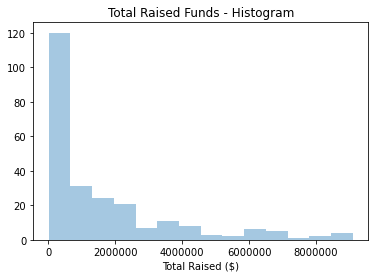

In [ ]:
#Total Raised Funds - Histogram
sns.distplot(df2['Total Raised'],kde=False,axlabel='Total Raised ($)').set_title('Total Raised Funds - Histogram')
plt.ticklabel_format(style='plain', axis='x')

<b>Mean Value for Total Raised Plots = $1.6M </b>

Min: $12,000
    
Max: $9.1M [583.9M if including outliers]

The data is very wide as it is only shows Total Raised Funds and not Funds Raised per Round (which would have been more helpful)

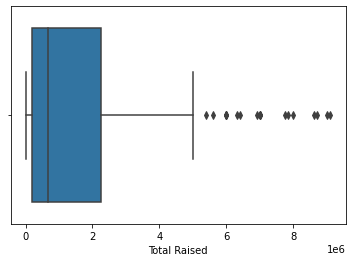

In [ ]:
#Total Raised Funds Boxplot
sns.boxplot(df2['Total Raised'])

## Countplot for Startups per Stage

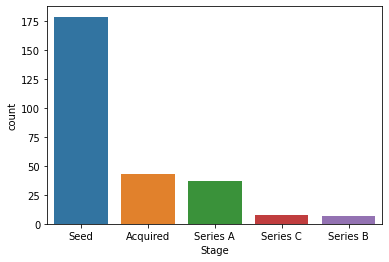

In [ ]:
#Countplot for Stage
sns.countplot(df['Stage'],order=df['Stage'].value_counts().index)

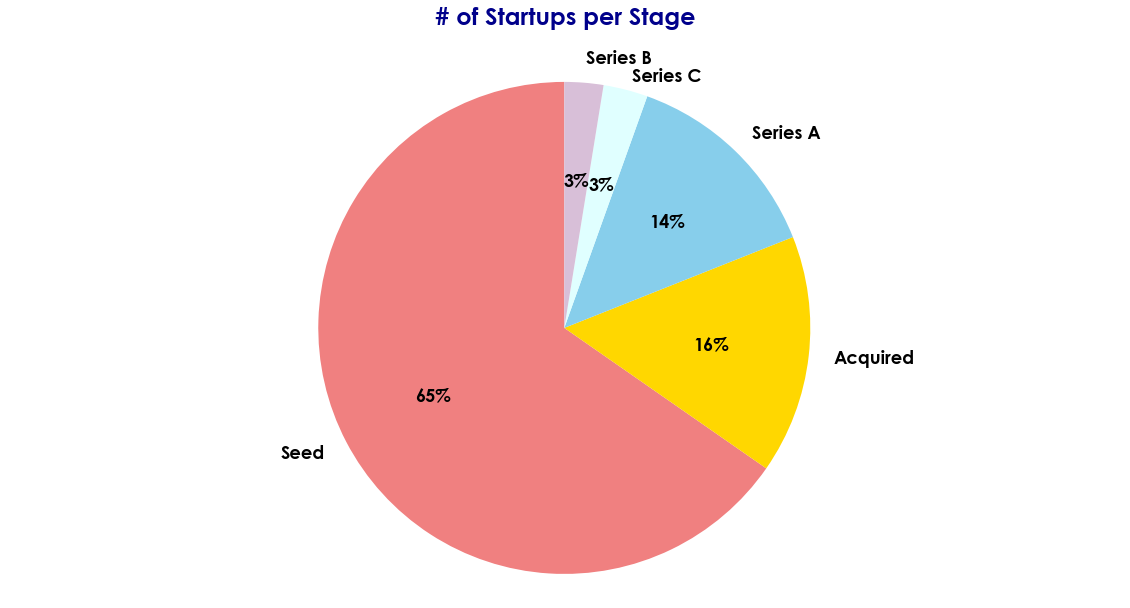

In [ ]:
import matplotlib.pyplot as plt

labels = ['Seed', 'Acquired', 'Series A', '\nSeries C', 'Series B']
sizes = [179,43,37,8,7]
colors = ['lightcoral', 'gold', 'skyblue','lightcyan','thistle']

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.0f%%', textprops={'fontsize': 18,'fontname':'Century Gothic','fontweight':'bold'},
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("# of Startups per Stage\n", fontsize=24, color='darkblue', fontname='Century Gothic', fontweight='bold') 
plt.show()

<b> A substantial amount of the startups (65%) in this dataset (Angel List Startups) are at the seed stage. </b>

## Countplot for Employee Count

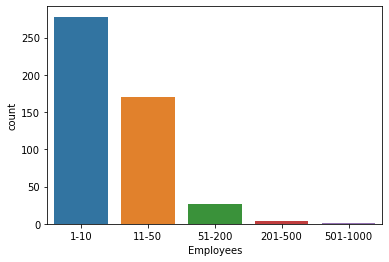

In [ ]:
#Countplot for Employee Count
sns.countplot(df['Employees'],order=df['Employees'].value_counts().index)

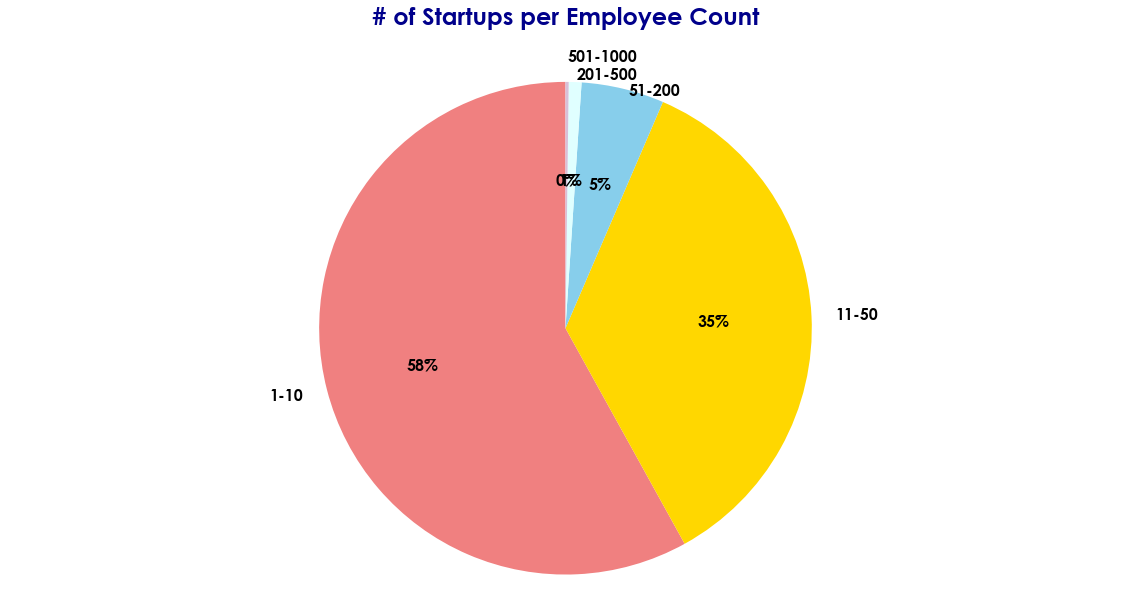

In [ ]:
labels = ['1-10', '11-50', '\n\n\n51-200', '\n\n201-500', '501-1000']
sizes = [278,170,26,4,1]
colors = ['lightcoral', 'gold', 'skyblue','lightcyan','thistle']

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.0f%%', textprops={'fontsize': 16,'fontname':'Century Gothic','fontweight':'bold'},
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("# of Startups per Employee Count\n", fontsize=24, color='darkblue', fontname='Century Gothic', fontweight='bold') 
plt.show()

<b> 93% of Startups in this dataset have 50 employees or below. </b>

## Most \# of Startups Per Country

In [ ]:
df3 = pd.DataFrame(df['Country'].value_counts())
df3.reset_index(inplace=True)
df3.columns = ['Country','Startup_Count']

In [ ]:
#Most # of Startups per Country
#Note that Afghanistan data may not accurately represent the true location of these startups.
#The Longitude and Latitude data given for the 16 Startups were identical - it is possible they were placeholders)
df3

,Country,Startup_Count
0,United States of America,288
1,England,26
2,Germany,21
3,India,20
4,Canada,20
5,Afghanistan,16
6,France,11
7,Israel,8
8,Italy,8
9,Singapore,5


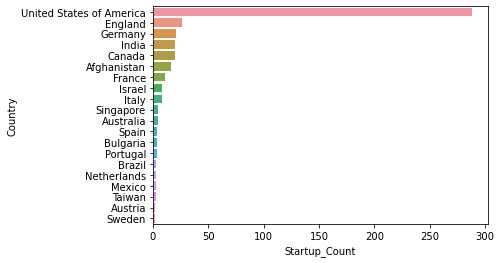

In [ ]:
#Top 20 Countries in terms of # of Startups
sns.barplot(x='Startup_Count',y='Country',data=df3.head(20))

<b> United States of America has a very large representation (58%) for this dataset. </b>

<i> Note: Afghanistan data may not accurately represent the true location of these startups.
The Longitude and Latitude data given for the 16 'Afghanistan' Startups were identical - it is possible they were placeholders) </i>

## Most \# of Startups Per City/Location

In [ ]:
df4 = pd.DataFrame(df['Location'].value_counts())
df4.reset_index(inplace=True)
df4.columns = ['Location','Startup_Count']
df4

,Location,Startup_Count
0,San Francisco,76
1,New York City,37
2,London,20
3,Los Angeles,13
4,Austin,11
...,...,...
163,Canada,1
164,United Kingdom,1
165,France,1
166,Marseille,1


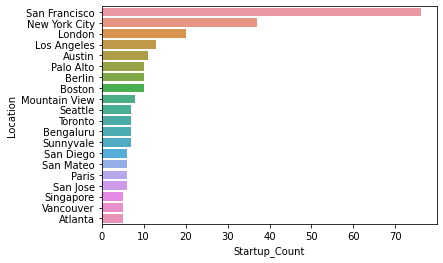

In [ ]:
#Top 20 Cities in terms of # of Startups
sns.barplot(x='Startup_Count',y='Location',data=df4.head(20))

<b> Majority of the cities are located in the USA with San Francisco and New York City leading the numbers for startup count. 

London (England), Berlin (Germany), Bengaluru (India), Toronto (Canada) and Paris (France) are non-USA cities which have a decent number of startups in the dataset. </b>

In [ ]:
#Most # of Startups per City / Location
df.groupby(['Location','Country'])['Name'].count().sort_values(ascending=False).head(20)

Location       Country                 
San Francisco  United States of America    76
New York City  United States of America    37
London         England                     20
Los Angeles    United States of America    13
Austin         United States of America    11
Boston         United States of America    10
Berlin         Germany                     10
Palo Alto      United States of America    10
Mountain View  United States of America     8
Seattle        United States of America     7
Sunnyvale      United States of America     7
Bengaluru      India                        7
Toronto        Canada                       7
San Diego      United States of America     6
San Jose       United States of America     6
Paris          France                       6
San Mateo      United States of America     6
Vancouver      Canada                       5
Singapore      Singapore                    5
Atlanta        United States of America     5
Name: Name, dtype: int64

## Most \# of Startups Market/Nature of Startup

In [ ]:
df5 = pd.DataFrame(df['Market'].value_counts())
df5.reset_index(inplace=True)
df5.columns = ['Market','Startup_Count']
df5

,Market,Startup_Count
0,SaaS,16
1,Big Data Analytics,14
2,Predictive Analytics,13
3,Internet of Things,13
4,Mobile Commerce,10
...,...,...
194,Sensors,1
195,Digital Signage,1
196,Fast-Moving Consumer Goods,1
197,Website,1


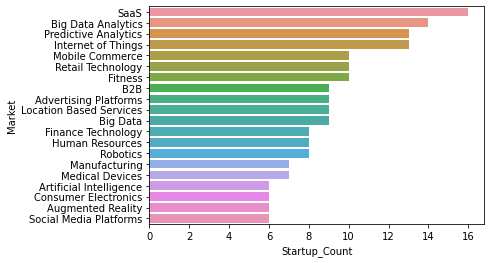

In [ ]:
#Most # of Startups per Market/Nature of Startup
sns.barplot(x='Startup_Count',y='Market',data=df5.head(20))

<b> SaaS, Big Data Analytics, Internet of Things and Predictive Analytics lead the category in terms of # of startups. </b>

## Highest Funded Market

In [ ]:
df6 = pd.DataFrame(df.groupby(['Market'])['Total Raised'].mean().sort_values(ascending=False))
df6.reset_index(inplace=True)
df6.columns = ['Market','Total Raised']
df6

,Market,Total Raised
0,Artificial Intelligence / Machine Learning,200680000.0
1,Technology,195050000.0
2,Robotics,115970000.0
3,Personal Finance,53706000.0
4,Digital Signage,26700000.0
...,...,...
194,Tracking,NaN
195,Unifed Communications,NaN
196,User Testing,NaN
197,Website,NaN


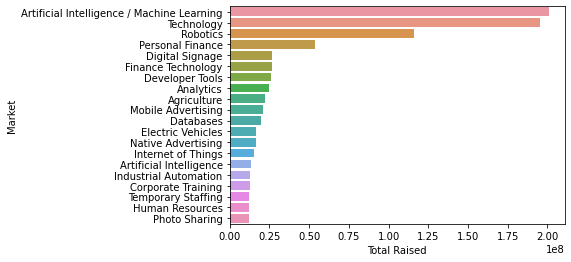

In [ ]:
#Highest Funded Markets (Top 20)
sns.barplot(x='Total Raised',y='Market',data=df6.head(20))

<b> AI/ML, Technology and Robotics are largely ahead in Total $ Amount Raised </b>

## Highest Funded Startups

In [ ]:
#Highest Funded Startups
df.groupby(['Name','Market'])['Total Raised'].mean().sort_values(ascending=False).head(20)

Name                 Market                                    
Kreditech            Technology                                    583900000.0
Zymergen             Robotics                                      576000000.0
Recursion            Artificial Intelligence / Machine Learning    200680000.0
Tala                 Personal Finance                              107400000.0
AppZen               Finance Technology                            102500000.0
Handle My Health     Internet of Things                             74038082.0
Glint                Human Resources                                50700000.0
Vidado               Artificial Intelligence                        47400000.0
Clarifai             Photo Sharing                                  40000000.0
SQream Technologies  Databases                                      33400000.0
DataScience.com      Big Data Analytics                             28000000.0
uSens                Digital Signage                               

In [ ]:
df7 = pd.DataFrame(df.groupby(['Name'])['Total Raised'].mean().sort_values(ascending=False))
df7.reset_index(inplace=True)
df7.columns = ['Name','Total Raised']
df7

,Name,Total Raised
0,Kreditech,583900000.0
1,Zymergen,576000000.0
2,Recursion,200680000.0
3,Tala,107400000.0
4,AppZen,102500000.0
...,...,...
492,pitchLove,NaN
493,simMachines,NaN
494,tarla.io,NaN
495,the Scaffold,NaN


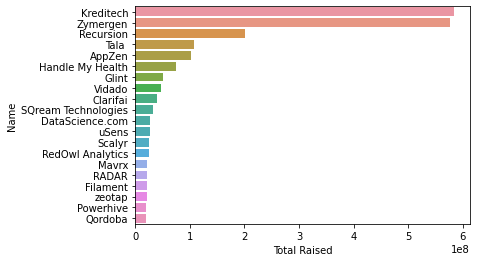

In [ ]:
#Highest Funded Startups (Top 20)
sns.barplot(x='Total Raised',y='Name',data=df7.head(20))

<b> Kreditech ($583.9M)

Zymergen ($576M)

Recursion ($200.68M) </b>

In [ ]:
df.groupby(['Stage'])['Total Raised'].min().sort_values(ascending=False).head(20)

Stage
Series C    6900000.0
Series B    2000000.0
Acquired     115000.0
Series A      20000.0
Seed          15000.0
Name: Total Raised, dtype: float64

In [ ]:
df.groupby(['Stage'])['Total Raised'].max().sort_values(ascending=False).head(20)

Stage
Series C    576000000.0
Acquired     74038082.0
Series B     33400000.0
Series A     28000000.0
Seed         26100000.0
Name: Total Raised, dtype: float64

In [ ]:
df.groupby(['Stage'])['Total Raised'].mean().sort_values(ascending=False).head(20)

Stage
Series C    1.329725e+08
Series B    1.786071e+07
Series A    1.043275e+07
Acquired    9.737349e+06
Seed        1.356948e+06
Name: Total Raised, dtype: float64

In [ ]:
# Stages and corresponding range of Amounts Raised:

#   Seed: $15,000 - $26.1M     | Mean: $1,356,948
#   Series A: $20,000 - $28M   | Mean: $10,432,750
#   Series B: $2M - $33.4M     | Mean: $17,860,710
#   Series C: $6.9M - $576M    | Mean: $132,972,500 (due to Outliers)
#   Acquired: $115,000 - $74M  | Mean: $9,737,349

In [ ]:
#Correlation matrix - no useful correlations. not much numerical information for this dataset.
df.corr()

,Signal,Total Raised,latitude,longitude,Age
Signal,1.000000,0.151260,0.000655,-0.329850,0.306643
Total Raised,0.151260,1.000000,0.031039,-0.032362,0.046937
latitude,0.000655,0.031039,1.000000,-0.214569,-0.033593
longitude,-0.329850,-0.032362,-0.214569,1.000000,-0.053950
Age,0.306643,0.046937,-0.033593,-0.053950,1.000000


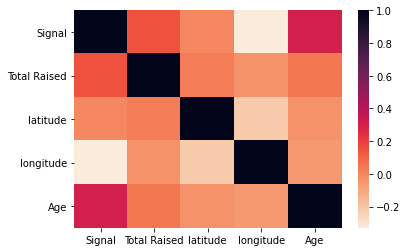

In [ ]:
sns.heatmap(df.corr(),cmap='rocket_r')